# Метод прогонки задача 14

## Условие

$\dfrac{d}{dx}(k(x)\dfrac{du}{dx})-q(x)u = -f(x)$

$u(0) = 0; u(1) = 1$

\begin{equation}
    \begin{cases}
      u(x_0-0)=u(x_0+0),\\
	  k(x_0-0)u_x(x_0-0)=k(x_0+0)u_x(x_0+0),
    \end{cases}
\end{equation}

$x < x_0 = 0.525; k(x) = x; q(x) = e^{-x}; f(x) = x^3$

$x > x_0 = 0.525; k(x) = x^2 + 1; q(x) = e^{-x}; f(x) = 1$

Модельная задача:

$x_0 = 0.525; k(x)=k(x_0); q(x)=q(x_0); f(x)=f(x_0)$

### Импорты и объявление глобальных переменных

In [109]:
import numpy as np
import matplotlib.pyplot as plt

STEP = 0.001

### Объявление функций из условия

In [110]:
def k(x, x0):
    val = 0.0
    if(x < x0):
        val = x
    if(x > x0):
        val = x**2+1
    return val

def q(x):
    return np.exp(-x)

def f(x, x0):
    val = 0.0
    if(x < x0):
        val = x**3
    if(x > x0):
        val = 1
    return val

### Метод прогонки

In [111]:
def run_through(x0, start_conds):
	n = int(1/STEP)
	x = np.arange(0, 1+STEP, STEP)
	
	n_left = int(x0/STEP)
	n_right = n_left+1
	
	u = np.zeros(n+1)
	u[0] = start_conds[0]
	u[-1] = start_conds[1]

	a = np.zeros(n+1, dtype=float)
	b = np.zeros(n+1, dtype=float)
	c = np.zeros(n+1, dtype=float)
	d = np.zeros(n+1, dtype=float)

	for i in range(1, n_left):
		a[i] = k((i+1/2)*STEP, x0)
		b[i] = -(k((i+1/2)*STEP, x0)+k((i-1/2)*STEP, x0)+q(i*STEP)*STEP**2)
		c[i] = k((i-1/2)*STEP, x0)
		d[i] = -f(i*STEP, x0)*STEP**2

	for i in range(n_right+1, n):
		a[i] = k((i+1/2)*STEP, x0)
		b[i] = -(k((i+1/2)*STEP, x0)+k((i-1/2)*STEP, x0)+q(i*STEP)*STEP**2)
		c[i] = k((i-1/2)*STEP, x0)
		d[i] = -f(i*STEP, x0)*STEP**2


	alpha = np.zeros(n+1, dtype=float)
	beta = np.zeros(n+1, dtype=float)

	alpha[1] = -a[1]/b[1]
	beta[1] = (d[1]-c[1]*u[0])/b[1]

	alpha[n-1] = -c[n-1]/b[n-1]
	beta[n-1] = (d[n-1] - c[n-1]*u[n])/b[n-1]

	for i in range(2, n_left):
		alpha[i] = -a[i]/(b[i]+c[i]*alpha[i-1])
		beta[i] = (d[i]-c[i]*beta[i-1])/(b[i]+c[i]*alpha[i-1])
	
	for i in range(n-2, n_right, -1):
		alpha[i] = -c[i]/(b[i]+a[i]*alpha[i+1])
		beta[i] = (d[i]-a[i]*beta[i+1])/(b[i]+a[i]*alpha[i+1])

	u[n_left] = k(n_left*STEP, x0)*beta[n_left-1]+k(n_right*STEP, x0)*beta[n_right+1]/\
				(k(n_left*STEP, x0)*(1-alpha[n_left-1])+k(n_right*STEP, x0)*(1-alpha[n_right+1]))
	
	u[n_right] = u[n_left]

	u[n_left-1] = alpha[n_left-1]*u[n_left]+beta[n_left-1]
	u[n_right+1] = alpha[n_right+1]*u[n_right]+beta[n_right+1]

	for i in range(n_left-1, 0, -1):
		u[i] = alpha[i]*u[i+1]+beta[i]
	
	for i in range(n_right+1, n):
		u[i] = alpha[i]*u[i-1]+beta[i]

	return u, x

### Решение методом прогонки

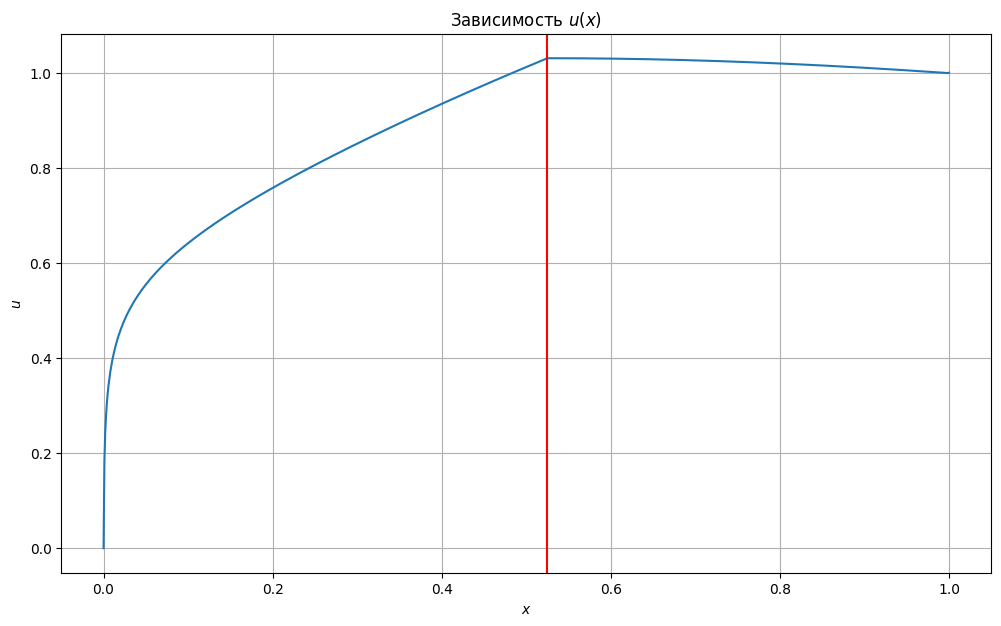

In [112]:
start_conds = np.array([0, 1])
x0 = 0.525

u, x = run_through(x0, start_conds)

fig = plt.figure(figsize=[12, 7])
plt.title('Зависимость $u(x)$')
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.grid()

plt.plot(x, u, '-')
plt.axvline(x = x0, color = 'r')